# Analyse der Chemischen Eigenschaften von Codons bzw. Aminosäuren

Zu den analysieren sind folgende Eigenschaften:
- Anzahl der Wasserstoffbrücken
- Die Ringstruktur der Base
- Die Chemische Gruppe der Base

Die Eigenschaften werden exemplarisch für jeweils eine Codongruppe mit Degeneriertheit 2, 4 und 6 aufgezeigt
Durch die Analyse soll untersucht werden ob die chemischen Eigenschaften der Codons einen Einfluss auf den CUB (Codon Usage Bias) haben, bzw. ob sich durch deren Betrachtung eine "Regel" ableiten lässt.

In [2]:
import pandas as pd
import sys
sys.path.append('../scripts')
from matplotlib import pyplot as plt
import seaborn as sns
import chemicalProperty as cp


COLI = '../data/E.Coli/cleanedData.pkl'
raw_df = pd.read_pickle(COLI)
scores_coli_phenylalanine = cp.scoreByChemProp(raw_df,cp.aminoDecoding['F'],False) #Phenylalanine 2
scores_coli_alanine = cp.scoreByChemProp(raw_df,cp.aminoDecoding['A'],False) #Alanine 4
scores_coli_arginine = cp.scoreByChemProp(raw_df,cp.aminoDecoding['R'],False) #Arginine 6 


In [42]:
# Fruchtfliege
FLY = '../data/Drosophila.Melanogaster/cleanedData.pkl'
raw_fly_df = pd.read_pickle(FLY)
scores_fly_phenylalanine = cp.scoreByChemProp(raw_fly_df,cp.aminoDecoding['F'],False)
scores_fly_alanine = cp.scoreByChemProp(raw_fly_df,cp.aminoDecoding['A'],False)
scores_fly_arginine = cp.scoreByChemProp(raw_fly_df,cp.aminoDecoding['R'],False)


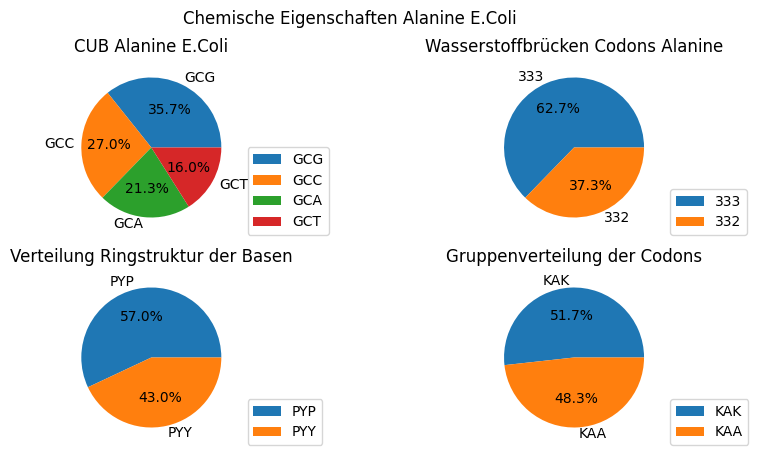

In [4]:
#Chemische Eigenschaften E.Coli Alanine
codons = scores_coli_alanine['CODON'].value_counts()
fig,axs = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(10,5)
fig.suptitle('Chemische Eigenschaften Alanine E.Coli')
axs[0,0].pie(x=codons.values,labels=codons.index,autopct='%1.01f%%')
axs[0,0].set_title('CUB Alanine E.Coli')
axs[0,0].legend(loc=(1.05,0))
axs[0,1].pie(x=scores_coli_alanine['HYDROGEN'].value_counts().values,labels=scores_coli_alanine.value_counts('HYDROGEN').index,autopct="%1.01f%%")
axs[0,1].set_title('Wasserstoffbrücken Codons Alanine')
axs[0,1].legend(loc=(1.05,0))
axs[1,0].pie(x=scores_coli_alanine['PURI_PYRI'].value_counts().values,labels=scores_coli_alanine['PURI_PYRI'].value_counts().index,autopct="%1.01f%%")
axs[1,0].set_title('Verteilung Ringstruktur der Basen')
axs[1,0].legend(loc=(1.05,0))
axs[1,1].pie(x=scores_coli_alanine['KETO_AMINO'].value_counts().values,labels=scores_coli_alanine['KETO_AMINO'].value_counts().index,autopct="%1.01f%%")
axs[1,1].set_title('Gruppenverteilung der Codons')
axs[1,1].legend(loc=(1.05,0))
plt.show()

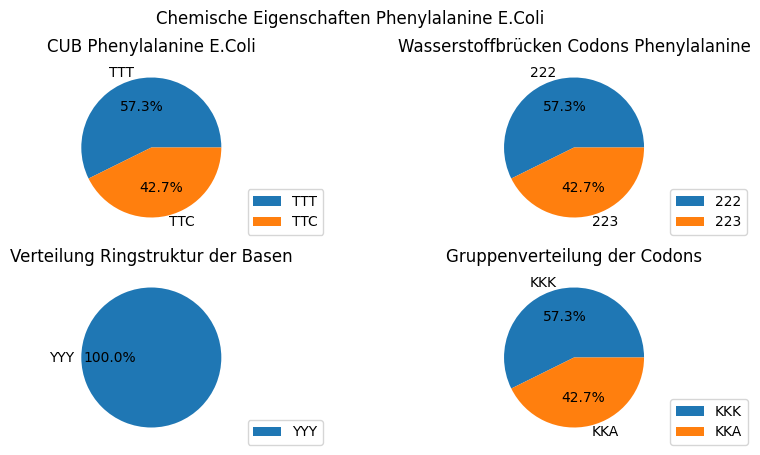

In [6]:
#Chemische Eigenschaften Phenylalanine E.Coli
phy = scores_coli_phenylalanine.value_counts('CODON')
fig_phy,axs_phy = plt.subplots(nrows=2,ncols=2)
fig_phy.set_size_inches(10,5)
fig_phy.suptitle('Chemische Eigenschaften Phenylalanine E.Coli')
axs_phy[0,0].pie(x=phy.values,labels=phy.index,autopct='%1.01f%%')
axs_phy[0,0].set_title("CUB Phenylalanine E.Coli")
axs_phy[0,0].legend(loc=(1.05,0))
axs_phy[0,1].pie(x=scores_coli_phenylalanine['HYDROGEN'].value_counts().values,labels=scores_coli_phenylalanine['HYDROGEN'].value_counts().index,autopct='%1.01f%%')
axs_phy[0,1].set_title("Wasserstoffbrücken Codons Phenylalanine")
axs_phy[0,1].legend(loc=(1.05,0))
axs_phy[1,0].pie(x=scores_coli_phenylalanine['PURI_PYRI'].value_counts().values,labels=scores_coli_phenylalanine['PURI_PYRI'].value_counts().index,autopct='%1.01f%%')
axs_phy[1,0].set_title("Verteilung Ringstruktur der Basen")
axs_phy[1,0].legend(loc=(1.05,0))
axs_phy[1,1].pie(x=scores_coli_phenylalanine['KETO_AMINO'].value_counts().values,labels=scores_coli_phenylalanine['KETO_AMINO'].value_counts().index,autopct='%1.01f%%')
axs_phy[1,1].set_title("Gruppenverteilung der Codons")
axs_phy[1,1].legend(loc=(1.05,0))
plt.show()

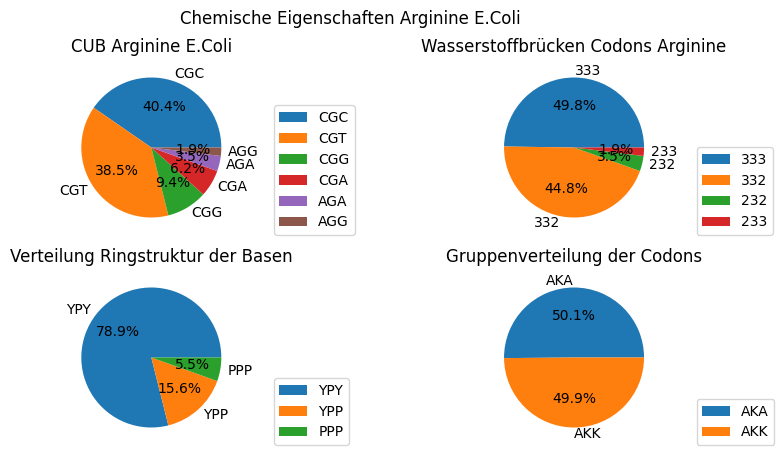

In [34]:
#Chemische Eigenschaften Arginine E.Coli
fig_arg,axs_arg = plt.subplots(2,2)
fig_arg.set_size_inches(10,5)
fig_arg.suptitle('Chemische Eigenschaften Arginine E.Coli')
cods = scores_coli_arginine['CODON'].value_counts()
hydro = scores_coli_arginine['HYDROGEN'].value_counts()
puripyri = scores_coli_arginine['PURI_PYRI'].value_counts()
ketoamino = scores_coli_arginine['KETO_AMINO'].value_counts()
props = [cods,hydro,puripyri,ketoamino]
for prop in range(len(props)):
    axs_arg.flatten()[prop].pie(x=props[prop].values,labels=props[prop].index,autopct="%1.01f%%")  
    axs_arg.flatten()[prop].legend(loc=(1.2,0))  
axs_arg[0,0].set_title("CUB Arginine E.Coli")
axs_arg[0,1].set_title("Wasserstoffbrücken Codons Arginine")
axs_arg[1,0].set_title("Verteilung Ringstruktur der Basen")
axs_arg[1,1].set_title("Gruppenverteilung der Codons")
plt.show()   

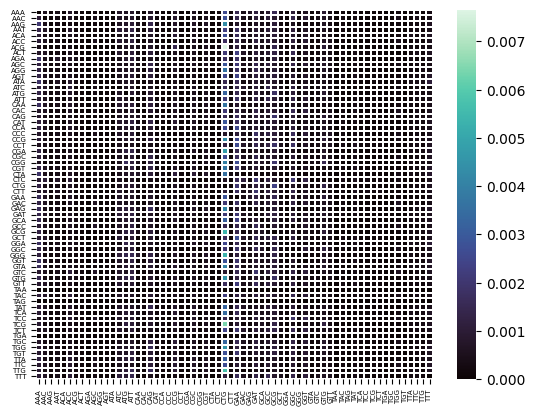

In [14]:
cp.kindaBLOSUMcodons(raw_df['sequence'].tolist())

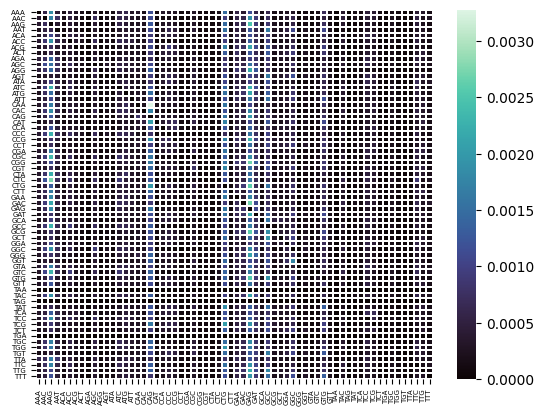

In [17]:
cp.kindaBLOSUMcodons(raw_fly_df['sequence'].tolist())

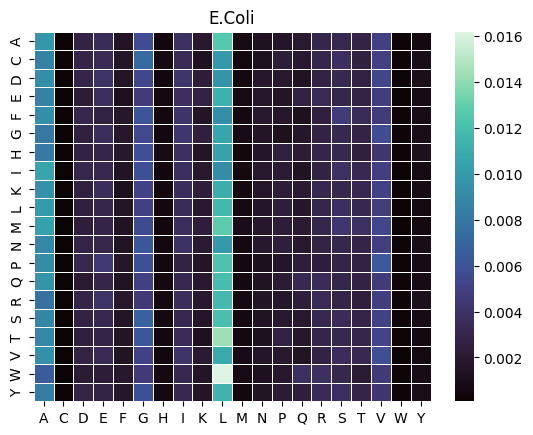

In [3]:
cp.kindaBLOSUMaminos(raw_df['translation'].apply(lambda x : x.seq).tolist(),'E.Coli')

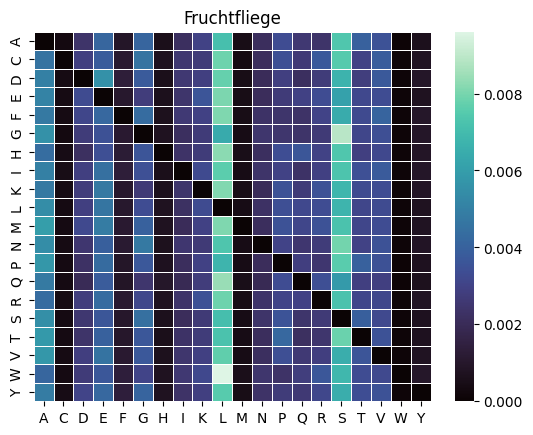

In [43]:
cp.kindaBLOSUMaminos(raw_fly_df['translation'].apply(lambda x : x.seq).tolist(),'Fruchtfliege')